# Analysis of Dataset with Seaborn and Matplotlib

## Introduction

This notebook demonstrates visualizing and analyzing a dataset, specifically focusing on relationships between variables such as ‘Age’ and ‘Outcome’. The notebook includes scatter plots with regression lines and histograms to understand the distribution of the ‘Age’ variable.

# Table of Contents:

- 1.Data Import and Exploration
- 2.Performing Descriptive Statistics¶
- 3.Performing Inferential Statistics and Confidence Intervals
- 4.Regression Analysis¶
- 5.Data Visualization
  - 5.1 Scatter Plot with Regression Line
  - 5.2 Histogram of Age
- 6.Conclusion

## 1. Data Import and Exploration

The dataset is loaded into a Pandas DataFrame to facilitate easy manipulation and analysis.

### Source:https://www.kaggle.com/code/melikedilekci/diabetes-dataset-for-beginners

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('diabetes.csv')

Explanation:
In this section, we load the dataset into a Pandas DataFrame 

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


we preview the first few rows. This step is crucial to understand the structure of the data.

## 2. Performing Descriptive Statistics

In [6]:
# Calculate basic descriptive statistics
print("Mean:\n", df.mean())
print("\nMedian:\n", df.median())
print("\nMode:\n", df.mode().iloc[0])
print("\nStandard Deviation:\n", df.std())
print("\nVariance:\n", df.var())
# Additional descriptive statistics
print("\nRange:\n", df.max() - df.min())
print("\nSkewness:\n", df.skew())
print("\nKurtosis:\n", df.kurt())

Mean:
 Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

Median:
 Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

Mode:
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               70.000
SkinThickness                0.000
Insulin                      0.000
BMI                         32.000
DiabetesPedigreeFunction     0.254
Age             

## 3.Performing Inferential Statistics and Confidence Intervals

In [7]:
import scipy.stats as stats

# Select the feature for analysis
feature = 'BMI'  # Replace with your desired feature

# Define the hypothesized value
hypothesized_value = 29.42699440206 # Replace with your hypothesized value

# Extract the data for the selected feature
data = df[feature]

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(data, hypothesized_value)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Determine if the hypothesis should be rejected
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. The average BMI is significantly different from the hypothesized value.")
else:
    print("The null hypothesis is accepted. There is no significant difference between the average BMI and the hypothesized value.")

# Calculate the 95% confidence interval
confidence_level = 0.95
degrees_of_freedom = len(data) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_of_freedom, loc=data.mean(), scale=stats.sem(data))

# Print the confidence interval
print(f"95% Confidence Interval for the mean of {feature}: {confidence_interval}")

T-statistic: 9.018023335156489
P-value: 1.509528057520365e-18
Reject the null hypothesis. The average BMI is significantly different from the hypothesized value.
95% Confidence Interval for the mean of BMI: (31.43409662818411, 32.55105962181588)


In [11]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


## 4.Regression Analysis

In [13]:
# Define the regression model with 'Outcome' as the dependent variable
model = smf.ols('Outcome ~ Age', data=df)

# Fit the model
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     46.14
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           2.21e-11
Time:                        23:19:35   Log-Likelihood:                -498.20
No. Observations:                 768   AIC:                             1000.
Df Residuals:                     766   BIC:                             1010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0276      0.050      0.551      0.5

## 5.Data Visualization

## 5.1 Scatter Plot with Regression Line

<function matplotlib.pyplot.show(close=None, block=None)>

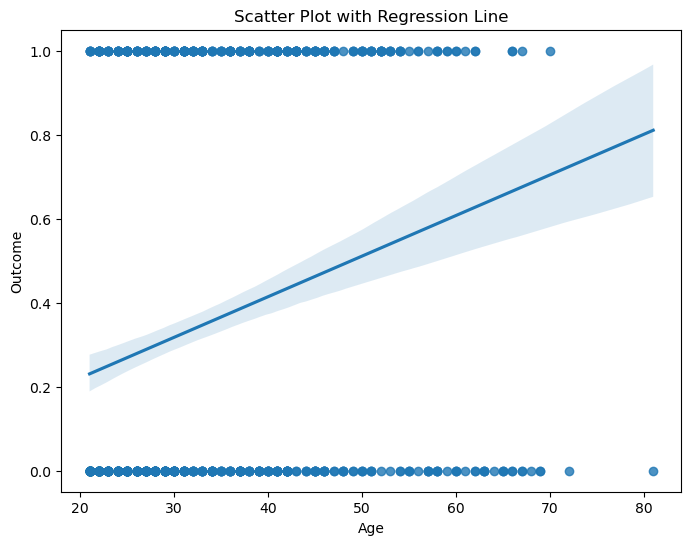

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Outcome', data=df)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.show

Explanation:
Here, we use the regplot() function from Seaborn to create a scatter plot with a regression line. The x-axis represents ‘Age’, and the y-axis represents ‘Outcome’. The regression line helps us understand the linear relationship between these two variables.


### 5.2 Histogram of Age

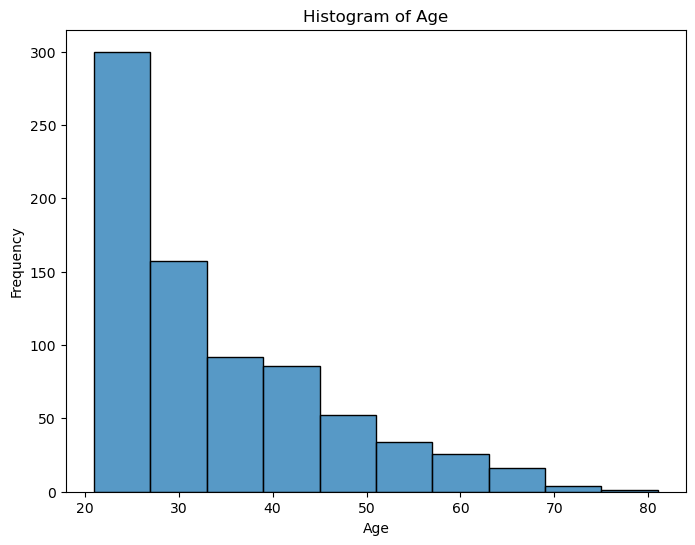

In [18]:
#Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Explanation:
This cell creates a histogram that shows the distribution of ‘Age’. The number of bins is set to 10, which divides the ‘Age’ data into 10 equal intervals to visualize its frequency.


## 6.Conclusion

In this notebook, we explored a dataset by visualizing the relationship between ‘Age’ and ‘Outcome’. The scatter plot with a regression line provided insights into the trend, while the histogram gave us an idea about the distribution of the ‘Age’ variable.